In [16]:
import numpy as np
import matplotlib.pyplot as plt
# from PIL import Image

import hopfield
import utilities as uti
# import learning_rules as lrn
# import activation_functions as afn
# from datasets import Dataset_demoletters, Dataset_MNIST, Dataset_Demyan

In [17]:
from tqdm import tqdm

hop_net = hopfield.HopfieldNetwork()

# ~7m for 300
net_N = 100
img_N = 15

network_size_range = range(1, net_N)
alphabet_size_range = range(1, img_N)
DATA = [[[] for x in network_size_range] for x in alphabet_size_range]

for i, alph_len in enumerate(tqdm(alphabet_size_range)):
    for j, size in enumerate(network_size_range):
        white_noise_dataset = np.random.randint(0, 2, size=(alph_len, size), dtype='int') * 2 - 1
        DATA[i][j] = hop_net.run(white_noise_dataset, 
                                  iterations=1000,
                                  lr="hebbian", af="sync_tanh",
                                  noise_level=.0,
                                  print_info=False)

100%|██████████| 14/14 [00:35<00:00,  2.55s/it]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
[0.5, 0.500001735454743, 0.9483754103242882, 0.9891232352869024, 0.9967461804583497, 0.9996261374386576, 0.9999483146967437, 0.9999668030356937, 0.9999969981421553, 0.9999843210263667, 0.9999972353031664, 0.9999970850057244, 0.9999999935259303, 0.9999999955226077, 0.9999999987659431, 0.9999999991584831, 0.9999999536224669, 0.9999999999952621, 0.999999999996989, 0.9999999974606617, 0.9999999999999157, 0.9999999999813999, 0.9999999999992326, 0.9999999999999485, 0.9999999999999188, 0.9999999999999908, 1.0, 1.0, 1.0, 0.9999999999999999, 0.9999999999999728, 0.999999999999994, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,

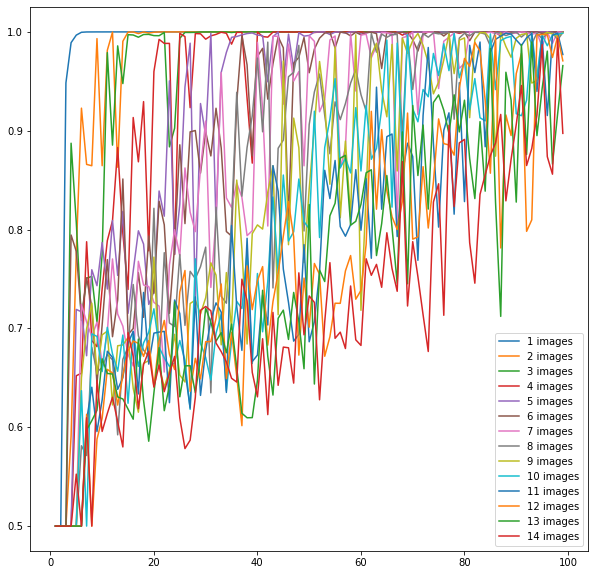

In [29]:
fig, axs = plt.subplots(1, 1, figsize=(10, 10))

for i, alph_len in enumerate(alphabet_size_range):
    errors = []
    for j, size in enumerate(network_size_range):
        pm = DATA[i][j]
        error = 1 - np.mean(np.array(pm.error))
        errors.append(error)
    axs.plot(range(1, len(errors)+1), errors, label=f"{i+1} images")
plt.legend()

from matplotlib.pyplot import gca
XX = gca().get_lines()[0].get_xdata()
print(XX.tolist())
for i in range(img_N-1):
    YY = gca().get_lines()[i].get_ydata()
    print(YY.tolist())

# print(PMs[0].shape)

In [19]:
# pms = [pm]
# neurons = [28 * 28]
# fig, axs = plt.subplots(2, 2, figsize=(10, 10))
# # 1
# ax_num_acc = axs[0][0]
# ax_num_acc.plot(neurons, [np.mean(pm.is_correct) for pm in pms])
# ax_num_acc.set_xlabel('#Neurons')
# ax_num_acc.set_ylabel("Accuracy")
# ax_num_acc.set_xticks(neurons)
# ax_num_acc.set_title(f"#Neuron v.s. Accuracy (#trial = {n_test_samples}, #input_sample={ninput})")


# # ax timestep accuracy
# ax_time_acc = axs[0][1]
# ax_time_acc.scatter([np.mean(pm.time) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_time_acc.set_xlabel(f"Mean timestamp on {n_test_samples} trials")
# ax_time_acc.set_ylabel("Accuracy")
# ax_time_acc.set_title("Mean timestamp v.s. Accuracy")

# # ax energy accuracy
# ax_energy_acc = axs[1][0]
# ax_energy_acc.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.is_correct) for pm in pms])
# ax_energy_acc.set_xlabel(f"Mean energy on {n_test_samples} trials")
# ax_energy_acc.set_ylabel("Accuracy")
# ax_energy_acc.set_title("Mean energy v.s. Accuracy")

# # ax energy accuracy
# ax_energy_time = axs[1][1]
# ax_energy_time.scatter([np.mean(pm.energy) for pm in pms], [np.mean(pm.time) for pm in pms])
# ax_energy_time.set_xlabel("Mean energy")
# ax_energy_time.set_ylabel("Mean Timestamp")
# ax_energy_time.set_title("Mean energy v.s. Mean Timestamp")
